# Home 3: Build a CNN for image recognition.

### Name: Taru Tak


## 0. You will do the following:

1. Read, complete, and run my code.

2. **Make substantial improvements** to maximize the accurcy.
    
3. Convert the .IPYNB file to .HTML file.

    * The HTML file must contain the code and the output after execution.
    
4. Upload this .HTML file to your Github repo.

4. Submit the link to this .HTML file to Canvas.

    * Example: https://github.com/wangshusen/CS583A-2019Spring/blob/master/homework/HM3/cnn.html


## 1. Data preparation

### 1.1. Load data


In [2]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
import numpy

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of x_train: ' + str(x_train.shape))
print('shape of y_train: ' + str(y_train.shape))
print('shape of x_test: ' + str(x_test.shape))
print('shape of y_test: ' + str(y_test.shape))
print('number of classes: ' + str(numpy.max(y_train) - numpy.min(y_train) + 1))

Using TensorFlow backend.


170500096/170498071 [==============================] - 22s 0us/step
shape of x_train: (50000, 32, 32, 3)
shape of y_train: (50000, 1)
shape of x_test: (10000, 32, 32, 3)
shape of y_test: (10000, 1)
number of classes: 10


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [3]:
def to_one_hot(y, num_class=10):
    targets = numpy.array(y).reshape(-1)
    return numpy.eye(num_class)[targets]

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (50000, 10)
Shape of y_test_vec: (10000, 10)
[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


#### Remark: the outputs should be
* Shape of y_train_vec: (50000, 10)
* Shape of y_test_vec: (10000, 10)
* [6]
* [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 50K training samples to 2 sets:
* a training set containing 40K samples
* a validation set containing 10K samples


In [4]:
rand_indices = numpy.random.permutation(50000)
train_indices = rand_indices[0:40000]
valid_indices = rand_indices[40000:50000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (40000, 32, 32, 3)
Shape of y_tr: (40000, 10)
Shape of x_val: (10000, 32, 32, 3)
Shape of y_val: (10000, 10)


## 2. Build a CNN and tune its hyper-parameters

1. Build a convolutional neural network model
2. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
3. Try to achieve a validation accuracy as high as possible.

### Remark: 

The following CNN is just an example. You are supposed to make **substantial improvements** such as:
* Add more layers.
* Use regularizations, e.g., dropout.
* Use batch normalization.

In [0]:
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation,BatchNormalization,Dropout
from keras.models import Sequential
from keras import regularizers, optimizers

In [7]:


model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2

In [0]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(x_tr)

In [9]:
batch_size = 128
epochs=75
model.compile(loss='categorical_crossentropy',
        optimizer=optimizers.rmsprop(lr=0.001),
        metrics=['accuracy'])
history=model.fit_generator(datagen.flow(x_tr, y_tr, batch_size=batch_size),steps_per_epoch = len(x_tr) / 128,epochs=epochs,verbose=1,validation_data=(x_val,y_val))

Instructions for updating:
Use tf.cast instead.
Epoch 1/75
313/312 [==============================] - 32s 103ms/step - loss: 1.9018 - acc: 0.3802 - val_loss: 1.8788 - val_acc: 0.3891
Epoch 2/75
313/312 [==============================] - 26s 83ms/step - loss: 1.4848 - acc: 0.5082 - val_loss: 1.4944 - val_acc: 0.5248
Epoch 3/75
313/312 [==============================] - 27s 85ms/step - loss: 1.3072 - acc: 0.5687 - val_loss: 1.3553 - val_acc: 0.5520
Epoch 4/75
313/312 [==============================] - 27s 85ms/step - loss: 1.1755 - acc: 0.6152 - val_loss: 1.2658 - val_acc: 0.5655
Epoch 5/75
313/312 [==============================] - 26s 82ms/step - loss: 1.1062 - acc: 0.6433 - val_loss: 1.0137 - val_acc: 0.6625
Epoch 6/75
313/312 [==============================] - 27s 85ms/step - loss: 1.0220 - acc: 0.6671 - val_loss: 0.9508 - val_acc: 0.6967
Epoch 7/75
313/312 [==============================] - 26s 83ms/step - loss: 0.9856 - acc: 0.6824 - val_loss: 0.9642 - val_acc: 0.6905
Epoch 8/75
31

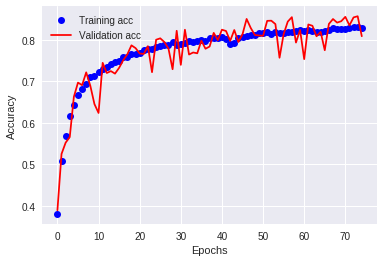

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 95:
        lr *= 0.5e-3
    elif epoch > 80:
        lr *= 1e-3
    elif epoch > 60:
        lr *= 1e-2
    elif epoch > 20:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

In [28]:
reg2=None
num_filters2=32
ac2='relu'
adm2=optimizers.Adam(lr=lr_schedule(0),decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
opt2=adm2
drop_dense2=0.5
drop_conv2=0

model2 = Sequential()

model2.add(Conv2D(num_filters2, (3, 3), activation=ac2, kernel_regularizer=reg2, input_shape=x_train.shape[1:],padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(2*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))   
model2.add(Dropout(drop_conv2))

model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(Conv2D(4*num_filters2, (3, 3), activation=ac2,kernel_regularizer=reg2,padding='same'))
model2.add(BatchNormalization(axis=-1))
model2.add(MaxPooling2D(pool_size=(2, 2)))  
model2.add(Dropout(drop_conv2))

model2.add(Flatten())
model2.add(Dense(512, activation=ac2,kernel_regularizer=reg2))
model2.add(BatchNormalization())
model2.add(Dropout(drop_dense2))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)

Learning rate:  0.001


In [29]:
model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_17 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_18 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
__________

In [30]:

history2=model2.fit_generator(datagen.flow(x_tr, y_tr, batch_size=128),
                    steps_per_epoch = len(x_tr) / 128, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
313/312 [==============================] - 36s 114ms/step - loss: 1.8330 - acc: 0.4032 - val_loss: 1.4391 - val_acc: 0.5233
Epoch 2/100
313/312 [==============================] - 28s 88ms/step - loss: 1.3576 - acc: 0.5375 - val_loss: 1.1565 - val_acc: 0.6102
Epoch 3/100
313/312 [==============================] - 27s 86ms/step - loss: 1.1628 - acc: 0.6048 - val_loss: 0.9983 - val_acc: 0.6666
Epoch 4/100
313/312 [==============================] - 28s 90ms/step - loss: 1.0344 - acc: 0.6441 - val_loss: 0.8077 - val_acc: 0.7213
Epoch 5/100
313/312 [==============================] - 27s 86ms/step - loss: 0.9266 - acc: 0.6778 - val_loss: 0.7795 - val_acc: 0.7286
Epoch 6/100
313/312 [==============================] - 28s 88ms/step - loss: 0.8396 - acc: 0.7079 - val_loss: 0.6900 - val_acc: 0.7633
Epoch 7/100
313/312 [==============================] - 27s 86ms/step - loss: 0.7844 - acc: 0.7247 - val_loss: 0.6652 - val_acc: 0.7683
Epoch 8/100
313/312 [==============================] -

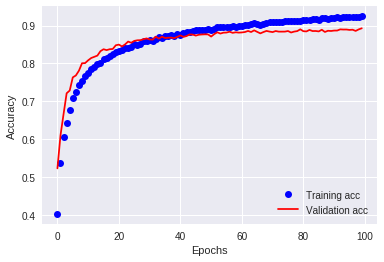

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history2.history['acc']
val_acc = history2.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Train (again) and evaluate the model

- To this end, you have found the "best" hyper-parameters. 
- Now, fix the hyper-parameters and train the network on the entire training set (all the 50K training samples)
- Evaluate your model on the test set.

### 3.1. Train the model on the entire training set

Why? Previously, you used 40K samples for training; you wasted 10K samples for the sake of hyper-parameter tuning. Now you already know the hyper-parameters, so why not using all the 50K samples for training?

In [0]:
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer=opt2)

In [49]:
history3 = model2.fit(x_train, y_train_vec, batch_size=128, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 28s 563us/step - loss: 0.1264 - acc: 0.9559
Epoch 2/5
50000/50000 [==============================] - 23s 466us/step - loss: 0.0340 - acc: 0.9888
Epoch 3/5
50000/50000 [==============================] - 23s 465us/step - loss: 0.0175 - acc: 0.9948
Epoch 4/5
50000/50000 [==============================] - 23s 464us/step - loss: 0.0123 - acc: 0.9966
Epoch 5/5
50000/50000 [==============================] - 23s 460us/step - loss: 0.0109 - acc: 0.9965


### 3.2. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [50]:
loss_and_acc = model2.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

10000/10000 [==============================] - 4s 415us/step
loss = 0.6905957343637943
accuracy = 0.8737
